In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#load the datasets
df = pd.read_csv(r"C:\Users\ADEDOYIN\Documents\Dataset.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**Task 1**

**Explore dataset dimensions**

In [3]:
df.shape

(9551, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

**Check for missing values**

In [5]:
#missing values
df.isna().sum().sort_values(ascending=False)


Cuisines                9
Restaurant ID           0
Currency                0
Rating text             0
Rating color            0
Aggregate rating        0
Price range             0
Switch to order menu    0
Is delivering now       0
Has Online delivery     0
Has Table booking       0
Average Cost for two    0
Restaurant Name         0
Latitude                0
Longitude               0
Locality Verbose        0
Locality                0
Address                 0
City                    0
Country Code            0
Votes                   0
dtype: int64

In [6]:
#percentage of missing values
(df.isna().sum().sort_values(ascending=False)/len(df))*100

Cuisines                0.094231
Restaurant ID           0.000000
Currency                0.000000
Rating text             0.000000
Rating color            0.000000
Aggregate rating        0.000000
Price range             0.000000
Switch to order menu    0.000000
Is delivering now       0.000000
Has Online delivery     0.000000
Has Table booking       0.000000
Average Cost for two    0.000000
Restaurant Name         0.000000
Latitude                0.000000
Longitude               0.000000
Locality Verbose        0.000000
Locality                0.000000
Address                 0.000000
City                    0.000000
Country Code            0.000000
Votes                   0.000000
dtype: float64

In [7]:
#handling missing values
df = df.dropna(subset=['Cuisines'])

In [8]:
df.isna().sum().sort_values(ascending=False)

Restaurant ID           0
Currency                0
Rating text             0
Rating color            0
Aggregate rating        0
Price range             0
Switch to order menu    0
Is delivering now       0
Has Online delivery     0
Has Table booking       0
Average Cost for two    0
Restaurant Name         0
Cuisines                0
Latitude                0
Longitude               0
Locality Verbose        0
Locality                0
Address                 0
City                    0
Country Code            0
Votes                   0
dtype: int64

**Perform data type conversions as needed**

In [9]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

Observations:
-The data contains 9551 observations with 21 attributes
-The "cuisines" feature has 9 missing values about (0.094%), which is negligible and will be retained for the analysis
-All observations are with the correct datatypess but might likely drop unneccessary columns later in the analysis

**Analyze "Aggregate rating" distribution. Address any class imbalances**

In [11]:
#checking the target columns
df['Aggregate rating']

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9542, dtype: float64

In [12]:
#check frequency of the rating
df['Aggregate rating'].value_counts()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     399
2.9     381
3.9     332
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     143
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      41
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

In [13]:
#To check the statistic
df['Aggregate rating'].describe().T

count    9542.000000
mean        2.665238
std         1.516588
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

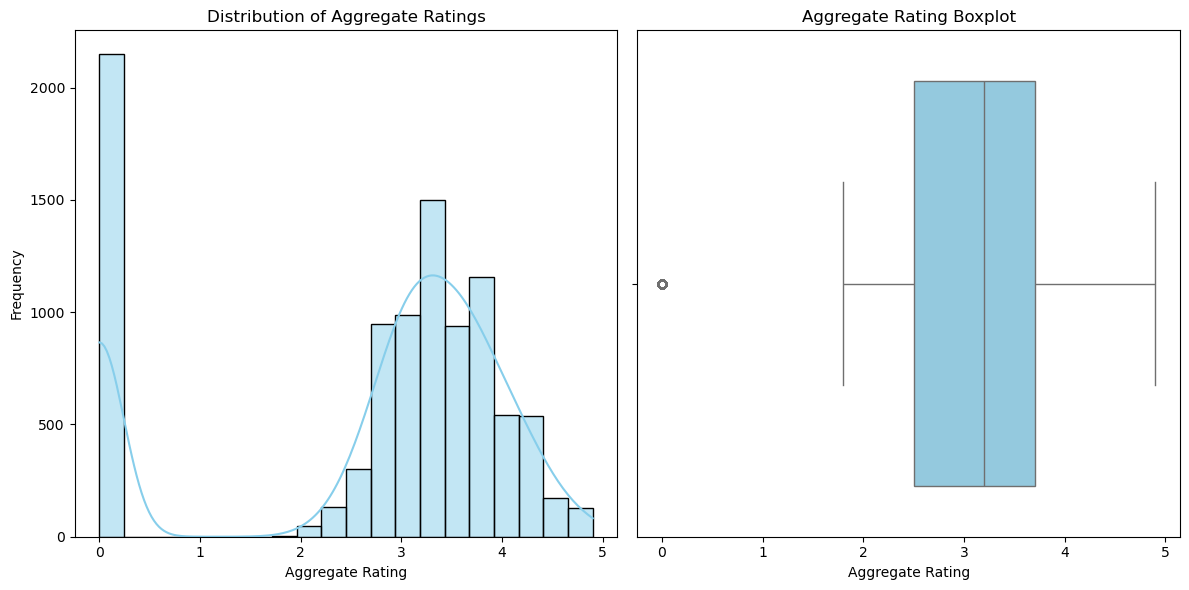

In [15]:
#To check the skewness
#plot histogram  and box plot for the visualization of the distribution

plt.figure(figsize=(12, 6))  # Adjusted figure size

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Aggregate Ratings')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='Aggregate rating', data=df, color='skyblue')
plt.title('Aggregate Rating Boxplot')
plt.xlabel('Aggregate Rating')

plt.tight_layout()  
plt.show()


In [12]:
#To check the skewness
df['Aggregate rating'].skew()


-0.9541304733200109

**Observation:**
*  The aggregate rating is a continuos variable and a regression problem therefore no class imbalances is needed
*  From the boxplot,it is seen that 0 is the only outlier in the plot
*  The ratings are negatively skewed, as seen from the histogram,with a longer left tail.
*  The skewness value is -0.95, which indicates a left-skewed distribution.


**Calculate statistics for numerical columns**


In [13]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


**Observation**:
*  The ranges of values in the numerical columns seem reasonable too, so we may not have to do much data cleaning.
*  The "Average cost for two" column seems to be significantly skewed, as the median (50 percentile) is much lower than the maximum value.
*  Longitude and Latitude:Restaurants are spread across a large geographic area, with notable variability in their locations .

**Identify top 5 cuisines and cities**

In [43]:
# Top 5 cuisines
popular_cuisines = df['Cuisines'].str.split(', ').explode().value_counts().head()
popular_cuisines

Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Name: count, dtype: int64

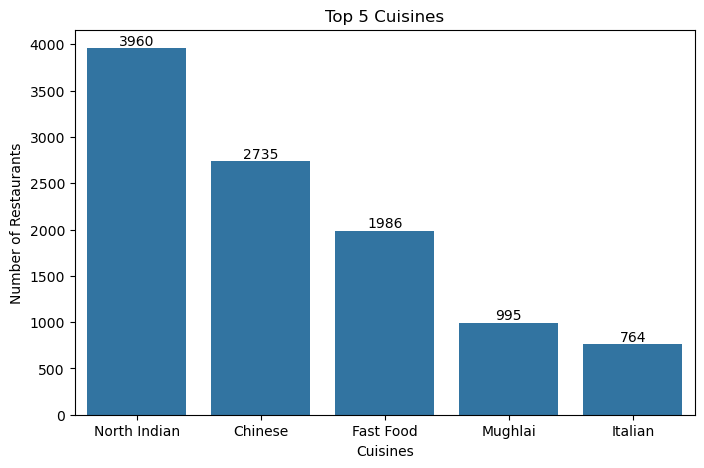

In [27]:
#plot barchart for visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=popular_cuisines.index, y=popular_cuisines.values)
plt.xlabel("Cuisines")
plt.ylabel("Number of Restaurants")
plt.title("Top 5 Cuisines")

# Add labels above each bar
for bars in plt.gca().containers:
    plt.bar_label(bars)
    
plt.show()

In [31]:
#top 5 cities
top_city = df['City'].value_counts().head(5)
top_city

City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64

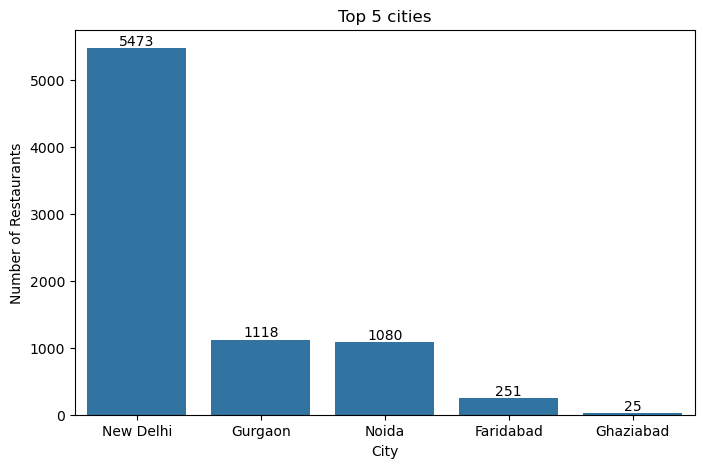

In [37]:
#plot barchart for visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=top_city.index,y=top_city.values)

plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.title("Top 5 cities")

for bars in plt.gca().containers:
    plt.bar_label(bars)

plt.show()

**Observation**:
* The bar plot clearly illustrates the dominance of North india cusinies admist all other restaurants and New Delhi has the highest number of restaurants in the top cities
* Top 5 cuisines are North india,Chinese,Fast Food,Mughlai and Italian  
* Top 5 cities are New Delhi,Gurgaon,Noida,Faridab and Ghaziabad